## LAB ASSIGNEMNT 02

Name: Imaad Hajwnae  
Year: 4th  
SRN: 202101132 / 23  
 
Topic: Implementation of:     
1. Multiple Regression Model  
2. Naive Bayis - Classification & Regression  
3. Random Forest Classification  
4. Decision Tree Regression

###### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from prettytable import PrettyTable
import missingno as msno
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\iamim\\OneDrive\\\Desktop\\Seventh_Semester\\ML_LAB\\L2\\df_arabica_clean.csv")


###### COLOR PALLET INITIALIZATION

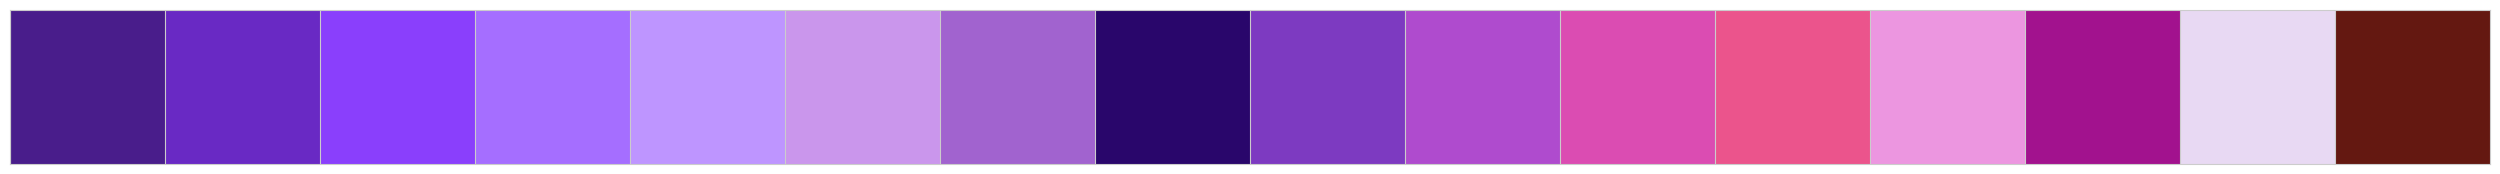

In [22]:
purple = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF',
          '#BE95FF', '#CA96EC', '#A163CF', '#29066B',
          '#7D3AC1', '#AF4BCE', '#DB4CB2', '#EB548C',
          '#EC96E0', '#A2128E', '#E8D9F3', '#641811']

sns.palplot(purple, size = 2)


In [30]:
data = data.copy()
data.head(n=10).style.background_gradient(cmap="Purples_r")


,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,nan,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.580000,8.500000,8.420000,8.580000,8.250000,8.420000,10.000000,10.000000,10.000000,8.580000,0.000000,89.330000,11.800000,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,nan,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.500000,8.500000,7.920000,8.000000,7.920000,8.250000,10.000000,10.000000,10.000000,8.500000,0.000000,87.580000,10.500000,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,nan,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.330000,8.420000,8.080000,8.170000,7.920000,8.170000,10.000000,10.000000,10.000000,8.330000,0.000000,87.420000,10.400000,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,nan,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.080000,8.170000,8.170000,8.250000,8.170000,8.080000,10.000000,10.000000,10.000000,8.250000,0.000000,87.170000,11.800000,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,nan,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.330000,8.330000,8.080000,8.250000,7.920000,7.920000,10.000000,10.000000,10.000000,8.250000,0.000000,87.080000,11.600000,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Atami, Shizuoka, 413-0002 JAPAN",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
5,5,5,Guatemala,La Colina,"The 2022 Pacific Rim Coffee Summit,GT02",Dinámica Café,nan,Taiwan Coffee Laboratory,1668,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.330000,8.330000,8.250000,7.830000,7.830000,8.170000,10.000000,10.000000,10.000000,8.250000,0.000000,87.000000,10.700000,0,0,green,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd., Xindian Dist. New Taipei City, Taiwan","Lin, Jen-An Neil 林仁安 - 886-289116612"
6,6,6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,"The 2022 Pa

In [31]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [32]:
data.describe().T.style.background_gradient(cmap = "magma")


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,207.000000,103.000000,59.899917,0.000000,51.500000,103.000000,154.500000,206.000000
ID,207.000000,103.000000,59.899917,0.000000,51.500000,103.000000,154.500000,206.000000
Number of Bags,207.000000,155.449275,244.484868,1.000000,1.000000,14.000000,275.000000,2240.000000
Aroma,207.000000,7.721063,0.287626,6.500000,7.580000,7.670000,7.920000,8.580000
Flavor,207.000000,7.744734,0.279613,6.750000,7.580000,7.750000,7.920000,8.500000
Aftertaste,207.000000,7.599758,0.275911,6.670000,7.420000,7.580000,7.750000,8.420000
Acidity,207.000000,7.690290,0.259510,6.830000,7.500000,7.670000,7.875000,8.580000
Body,207.000000,7.640918,0.233499,6.830000,7.500000,7.670000,7.750000,8.250000
Balance,207.000000,7.644058,0.256299,6.670000,7.500000,7.670000,7.790000,8.420000
Uniformity,207.000000,9.990338,0.103306,8.670000,10.000000,10.000000,10.000000,10.000000


In [26]:
print("Totally there are {} null values in the dataset".format(df.isnull().sum().sum()))


Totally there are 153 null values in the dataset


In [34]:
table = PrettyTable()
table.field_names = ['Feature', 'Data Type']

for column in data.columns:
    column_dtype = str(data[column].dtype)
    table.add_row([column, column_dtype])

print(table)


+-----------------------+-----------+
|        Feature        | Data Type |
+-----------------------+-----------+
|       Unnamed: 0      |   int64   |
|           ID          |   int64   |
|   Country of Origin   |   object  |
|       Farm Name       |   object  |
|       Lot Number      |   object  |
|          Mill         |   object  |
|       ICO Number      |   object  |
|        Company        |   object  |
|        Altitude       |   object  |
|         Region        |   object  |
|        Producer       |   object  |
|     Number of Bags    |   int64   |
|       Bag Weight      |   object  |
|   In-Country Partner  |   object  |
|      Harvest Year     |   object  |
|      Grading Date     |   object  |
|         Owner         |   object  |
|        Variety        |   object  |
|         Status        |   object  |
|   Processing Method   |   object  |
|         Aroma         |  float64  |
|         Flavor        |  float64  |
|       Aftertaste      |  float64  |
|        Aci

###### Data Visualization

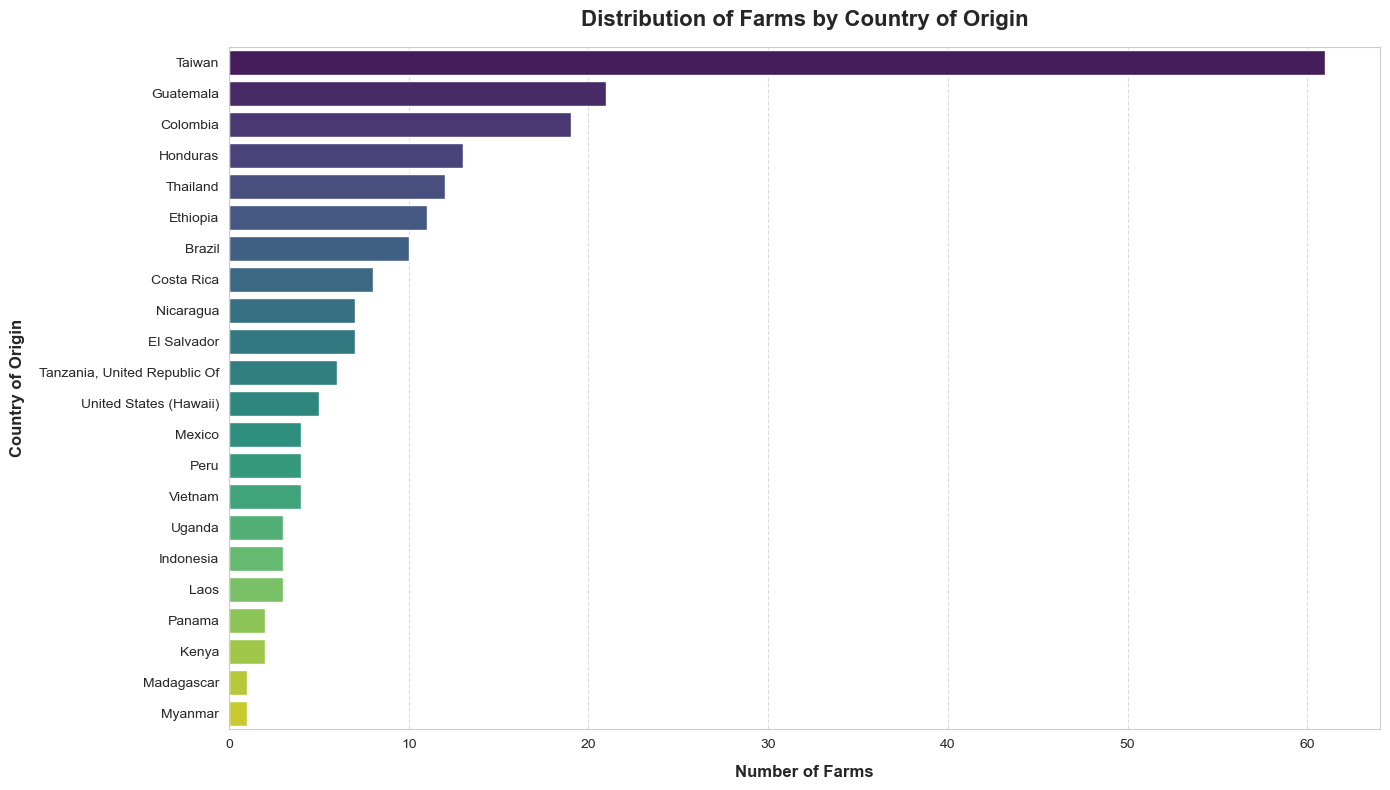

In [35]:
# Set a style for the plot
sns.set_style('whitegrid')

# Create a figure and axis object with a specific size
plt.figure(figsize=(14, 8))

# Generate the count plot with improved aesthetics
sns.countplot(
    data=df, 
    y='Country of Origin', 
    order=df['Country of Origin'].value_counts().index,
    palette='viridis'  # Use a color palette for better aesthetics
)

# Add labels and title with improved fonts and styles
plt.xlabel('Number of Farms', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Country of Origin', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Distribution of Farms by Country of Origin', fontsize=16, fontweight='bold', pad=15)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


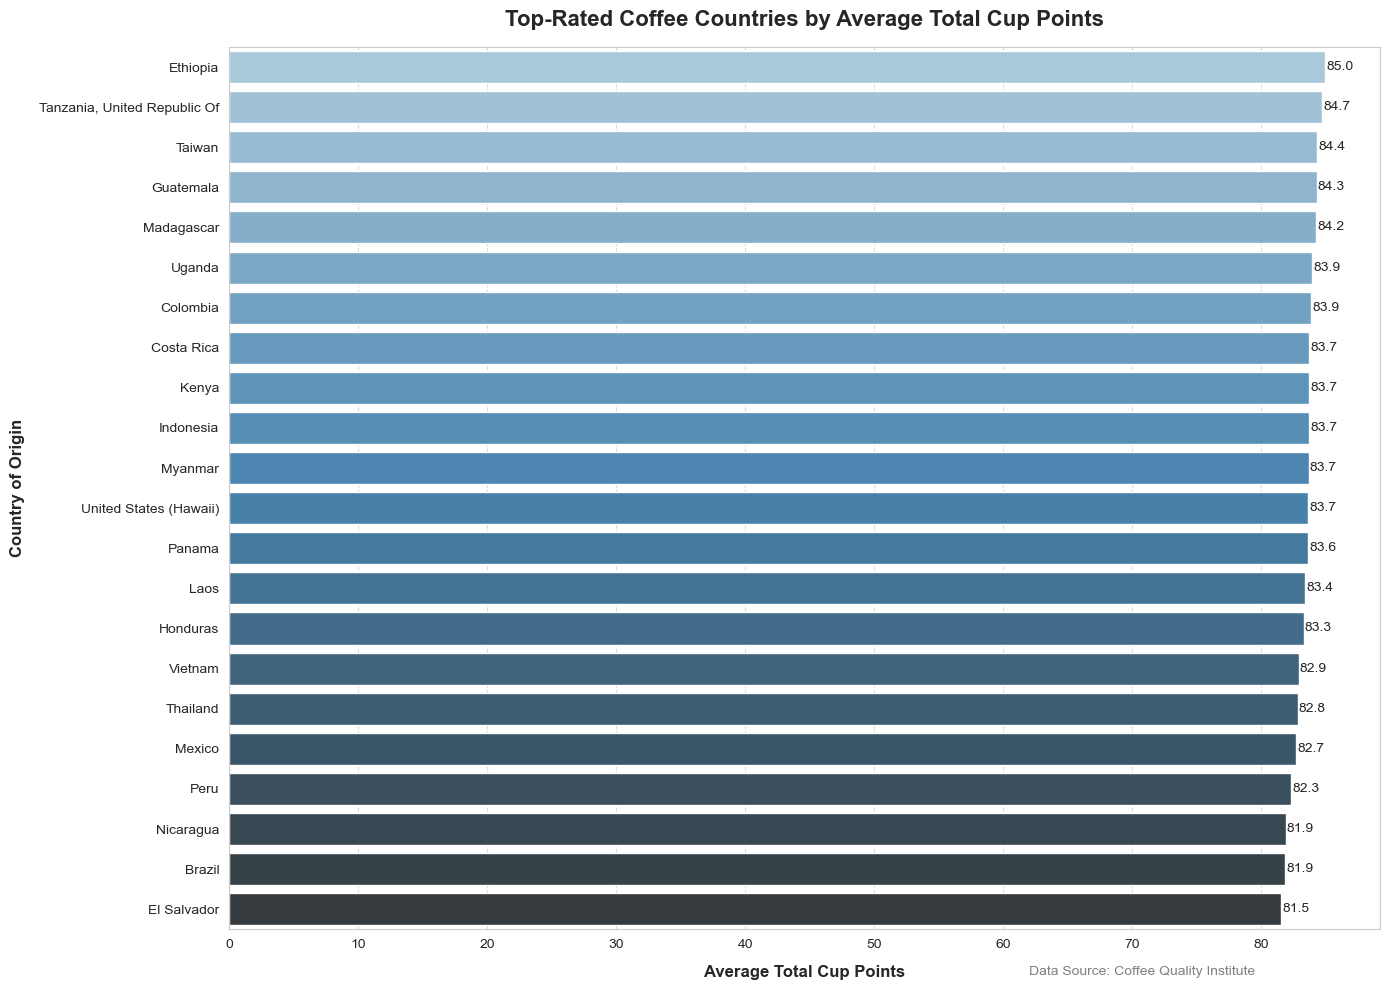

In [29]:
# Calculate average points for each country
average_points = data.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

# Sort countries by average total cup points in descending order
sorted_countries = average_points.sort_values('Total Cup Points', ascending=False)

# Set the style and color palette for the plot
sns.set_style('whitegrid')
palette = sns.color_palette('Blues_d', len(sorted_countries))

# Create the figure and axis
plt.figure(figsize=(14, 10))

# Generate the bar plot
sns.barplot(
    data=sorted_countries,
    x='Total Cup Points',
    y='Country of Origin',
    palette=palette
)

# Set the labels and title with enhanced fonts
plt.xlabel('Average Total Cup Points', fontsize=12, fontweight='bold', labelpad=10)
plt.ylabel('Country of Origin', fontsize=12, fontweight='bold', labelpad=10)
plt.title('Top-Rated Coffee Countries by Average Total Cup Points', fontsize=16, fontweight='bold', pad=15)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with the average points value
for index, value in enumerate(sorted_countries['Total Cup Points']):
    plt.text(value + 0.1, index, f'{value:.1f}', va='center', fontsize=10)

# Add a legend or additional text if necessary
plt.figtext(0.9, 0.02, 'Data Source: Coffee Quality Institute', horizontalalignment='right', fontsize=10, color='gray')

# Adjust layout to prevent clipping of ylabel/title
plt.tight_layout()

# Display the plot
plt.show()


In [37]:
import plotly.express as px

# Group by 'Country of Origin' and 'Farm Name', calculating the mean of 'Total Cup Points'
average_points = data.groupby(['Country of Origin', 'Farm Name'])['Total Cup Points'].mean().reset_index()

# Sort farms within each country by total cup points in descending order
sorted_farms = average_points.sort_values(['Country of Origin', 'Total Cup Points'], ascending=[True, False])

# Select the top farm for each country
top_farms = sorted_farms.groupby('Country of Origin').first().reset_index()

# Create a scatter plot using Plotly Express
fig = px.scatter(
    top_farms,
    x='Total Cup Points',
    y='Country of Origin',
    text='Farm Name',
    title='Top Coffee Farms in Each Country',
    color='Total Cup Points',
    labels={'Total Cup Points': 'Average Total Cup Points'},
    size='Total Cup Points',
    size_max=15,
    hover_data={
        'Total Cup Points': ':.2f',  # Format Total Cup Points to two decimal places
        'Country of Origin': True,
        'Farm Name': True
    },
    template='plotly_white'
)

# Update traces for better text position and marker aesthetics
fig.update_traces(
    textposition='top center',
    marker=dict(
        line=dict(width=1, color='DarkSlateGrey'),
        opacity=0.7
    )
)

# Update layout with enhanced title, axis labels, and grid
fig.update_layout(
    xaxis_title='Average Total Cup Points',
    yaxis_title='Country of Origin',
    title={
        'text': 'Top Coffee Farms in Each Country by Average Total Cup Points',
        'font': {'size': 20, 'family': 'Arial', 'color': 'DarkSlateGrey'},
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    xaxis=dict(
        tickfont=dict(size=12),
        titlefont=dict(size=14, family='Arial', color='Black'),
        gridcolor='LightGray',
        zerolinecolor='Gray'
    ),
    yaxis=dict(
        tickfont=dict(size=12),
        titlefont=dict(size=14, family='Arial', color='Black'),
        gridcolor='LightGray',
        zerolinecolor='Gray'
    ),
    coloraxis_colorbar=dict(
        title='Total Cup Points',
        thickness=15,
        len=0.5,
        yanchor='middle',
        xanchor='right',
        xpad=20
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial'
    ),
    margin=dict(l=60, r=60, t=80, b=60),  # Adjust margins
    width=900,
    height=600
)

# Show the plot
fig.show()


In [38]:
columns = ['Flavor', 'Aroma', 'Aftertaste', 'Acidity', 'Body', 'Balance',
           'Uniformity', 'Sweetness', 'Overall']
data['Mean Score'] = data[columns].mean(axis=1)
best_coffee_row = data.loc[data['Mean Score'].idxmax()]
best_coffee_details = best_coffee_row[['Company', 'Variety', 'Country of Origin', 'Farm Name', 'Processing Method']]
print("Best Coffee Combination:")
print("Company:", best_coffee_details['Company'])
print("Variety:", best_coffee_details['Variety'])
print("Country of Origin:", best_coffee_details['Country of Origin'])
print("Farm Name:", best_coffee_details['Farm Name'])
print("Processing Method:", best_coffee_details['Processing Method'])


Best Coffee Combination:
Company: Coffee Quality Union
Variety: Castillo
Country of Origin: Colombia
Farm Name: Finca El Paraiso
Processing Method: Double Anaerobic Washed


In [39]:
import pandas as pd
import plotly.express as px

# Step 1: Calculate Farm Count per Company
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']

# Step 2: Sort Companies by Farm Count in Descending Order
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)

# Step 3: Select Top 5 Companies with the Most Farms
top_companies = sorted_companies.head(5)

# Step 4: Analyze Moisture Percentage for Each Variety of Coffee in Top Companies
for company in top_companies['Company']:
    company_data = data[data['Company'] == company]
    
    # Calculate the average moisture percentage per variety for the company
    variety_moisture = company_data.groupby('Variety')['Moisture Percentage'].mean().reset_index()
    
    # Sort varieties by moisture percentage in ascending order
    sorted_varieties = variety_moisture.sort_values('Moisture Percentage', ascending=True)
    
    # Identify the variety with the best (lowest) moisture percentage
    best_variety = sorted_varieties.iloc[0]['Variety']
    
    # Step 5: Plot the Moisture Percentage for Each Variety
    fig = px.bar(
        sorted_varieties, 
        x='Variety', 
        y='Moisture Percentage',
        title=f'Average Moisture Percentage by Variety for {company}',
        labels={'Moisture Percentage': 'Average Moisture Percentage'},
        text='Moisture Percentage',
        template='plotly_white',
        color='Moisture Percentage',
        color_continuous_scale='Blues'
    )
    
    # Enhance the figure with additional layout and styling
    fig.update_traces(
        texttemplate='%{text:.2f}%',  # Format the moisture percentage to two decimal places
        textposition='outside',       # Place the text labels outside the bars
        marker=dict(
            line=dict(width=1, color='DarkSlateGrey')
        )
    )
    
    fig.update_layout(
        xaxis_title='Variety',
        yaxis_title='Average Moisture Percentage',
        title={
            'text': f'Average Moisture Percentage by Variety for {company}',
            'font': {'size': 20, 'family': 'Arial', 'color': 'DarkSlateGrey'},
            'x': 0.5,  # Center the title
            'xanchor': 'center'
        },
        xaxis=dict(
            tickfont=dict(size=12),
            titlefont=dict(size=14, family='Arial', color='Black'),
            gridcolor='LightGray',
            zerolinecolor='Gray'
        ),
        yaxis=dict(
            tickfont=dict(size=12),
            titlefont=dict(size=14, family='Arial', color='Black'),
            gridcolor='LightGray',
            zerolinecolor='Gray'
        ),
        margin=dict(l=60, r=60, t=80, b=60),  # Adjust margins
        width=900,
        height=600
    )
    
    # Display the plot
    fig.show()


In [40]:
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)
top_companies = sorted_companies.head(5)
for company in top_companies['Company']:
    company_data = data[data['Company'] == company]
    variety_flavor = company_data.groupby('Variety')['Flavor'].mean().reset_index()
    sorted_varieties = variety_flavor.sort_values('Flavor', ascending=False)
    best_variety = sorted_varieties.iloc[0]['Variety']
    fig = px.bar(sorted_varieties, x='Variety', y='Flavor',
                 title=f'Best Flavor Variety for {company}', labels={'Flavor': 'Average Flavor'})

    fig.show()


In [41]:
variety_counts = data['Variety'].value_counts().reset_index()
variety_counts.columns = ['Variety', 'Farm Count']
sorted_varieties = variety_counts.sort_values('Farm Count', ascending=False)
top_varieties = sorted_varieties.head(15)
fig = px.bar(top_varieties, x='Variety', y='Farm Count',
             title='Top Varieties', labels={'Farm Count': 'Number of Farms'})
fig.show()
fig = px.sunburst(top_varieties, path=['Variety'], values='Farm Count',
                  title='Top Varieties')
fig.show()


In [42]:
import pandas as pd
import plotly.express as px

# Step 1: Calculate the Number of Farms per Company
company_counts = data['Company'].value_counts().reset_index()
company_counts.columns = ['Company', 'Farm Count']

# Step 2: Sort Companies by Farm Count in Descending Order
sorted_companies = company_counts.sort_values('Farm Count', ascending=False)

# Step 3: Identify the Top Company with the Most Farms
top_company = sorted_companies.iloc[0]['Company']

# Step 4: Filter Data for the Top Company
top_company_data = data[data['Company'] == top_company]

# Step 5: Calculate the Number of Farms per Country for the Top Company
country_counts = top_company_data['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country', 'Farm Count']

# Step 6: Create a Choropleth Map to Show Farm Distribution by Country
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Farm Count',
    title=f'Distribution of Farms by Country for Top Company: {top_company}',
    labels={'Farm Count': 'Number of Farms'},
    color_continuous_scale=px.colors.sequential.Plasma,
    template='plotly_white',
    hover_data={'Country': True, 'Farm Count': True}
)

# Step 7: Enhance the Layout and Aesthetics of the Map
fig.update_geos(
    projection_type='natural earth',  # Use a natural earth projection
    showcountries=True,
    countrycolor='LightGrey',
    showcoastlines=True,
    coastlinecolor='LightBlue',
    showland=True,
    landcolor='whitesmoke'
)

fig.update_layout(
    title={
        'text': f'Distribution of Farms by Country for Top Company: {top_company}',
        'font': {'size': 20, 'family': 'Arial', 'color': 'DarkSlateGrey'},
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    margin=dict(l=50, r=50, t=100, b=50),  # Adjust margins
    coloraxis_colorbar=dict(
        title='Number of Farms',
        thickness=15,
        len=0.5,
        yanchor='middle',
        xanchor='right',
        xpad=20
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial'
    ),
    width=1000,
    height=600
)

# Step 8: Display the Choropleth Map
fig.show()


<Figure size 1500x1200 with 0 Axes>

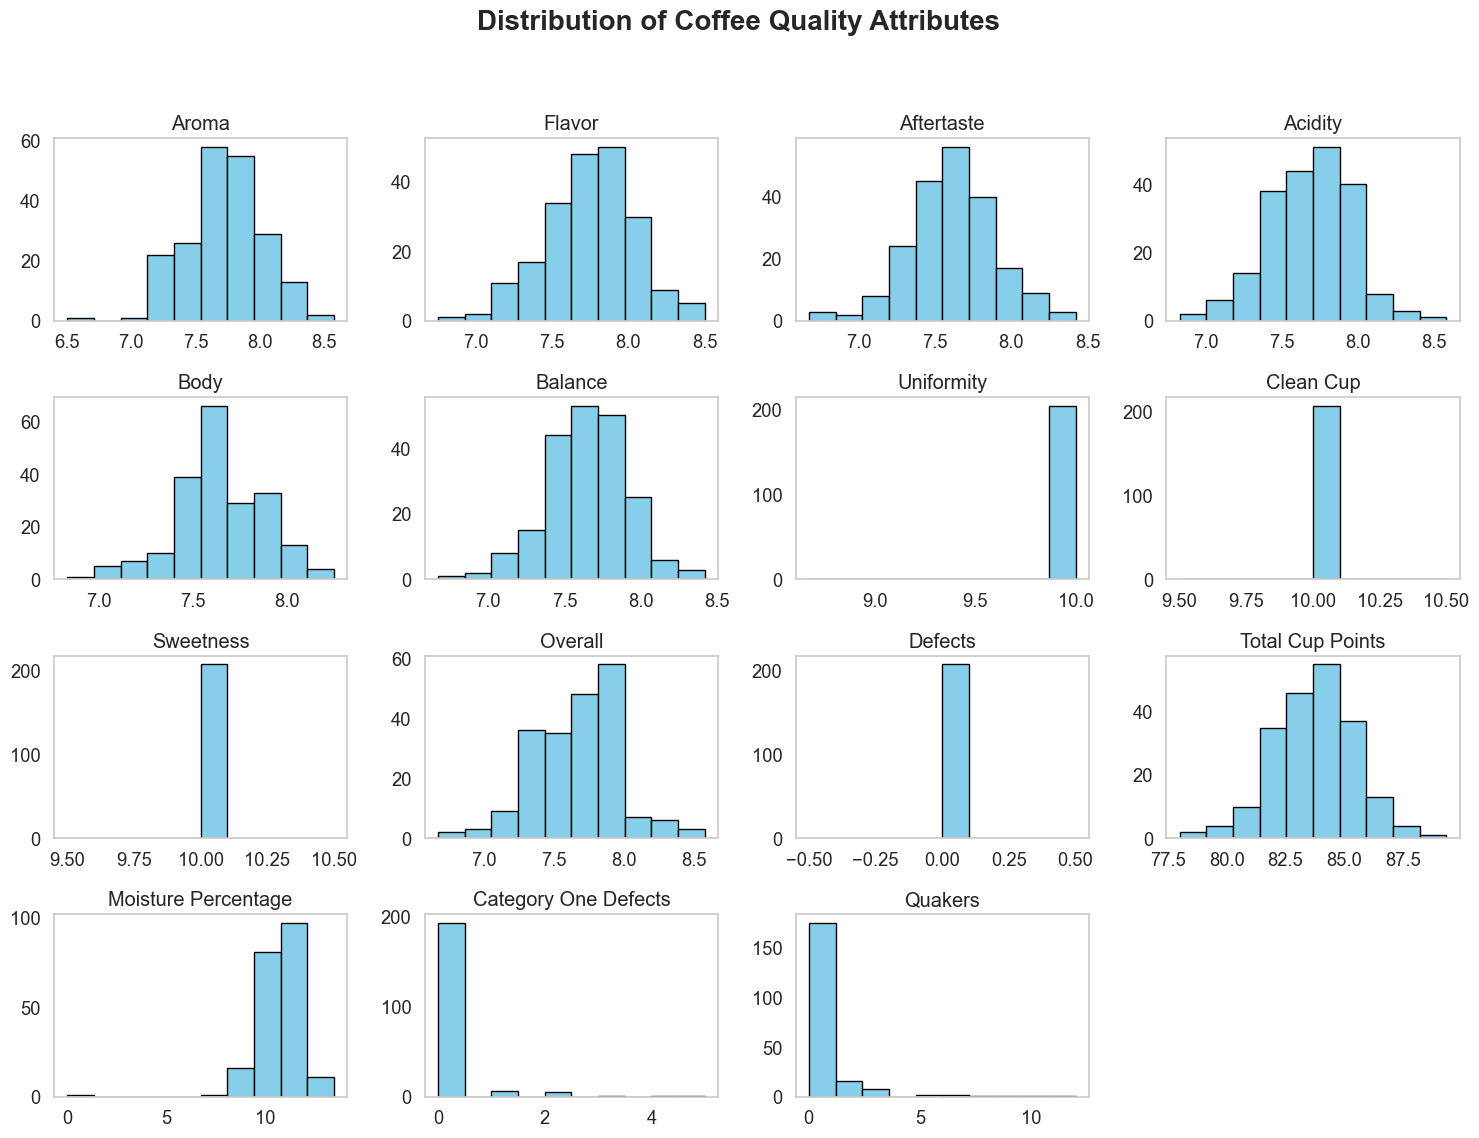

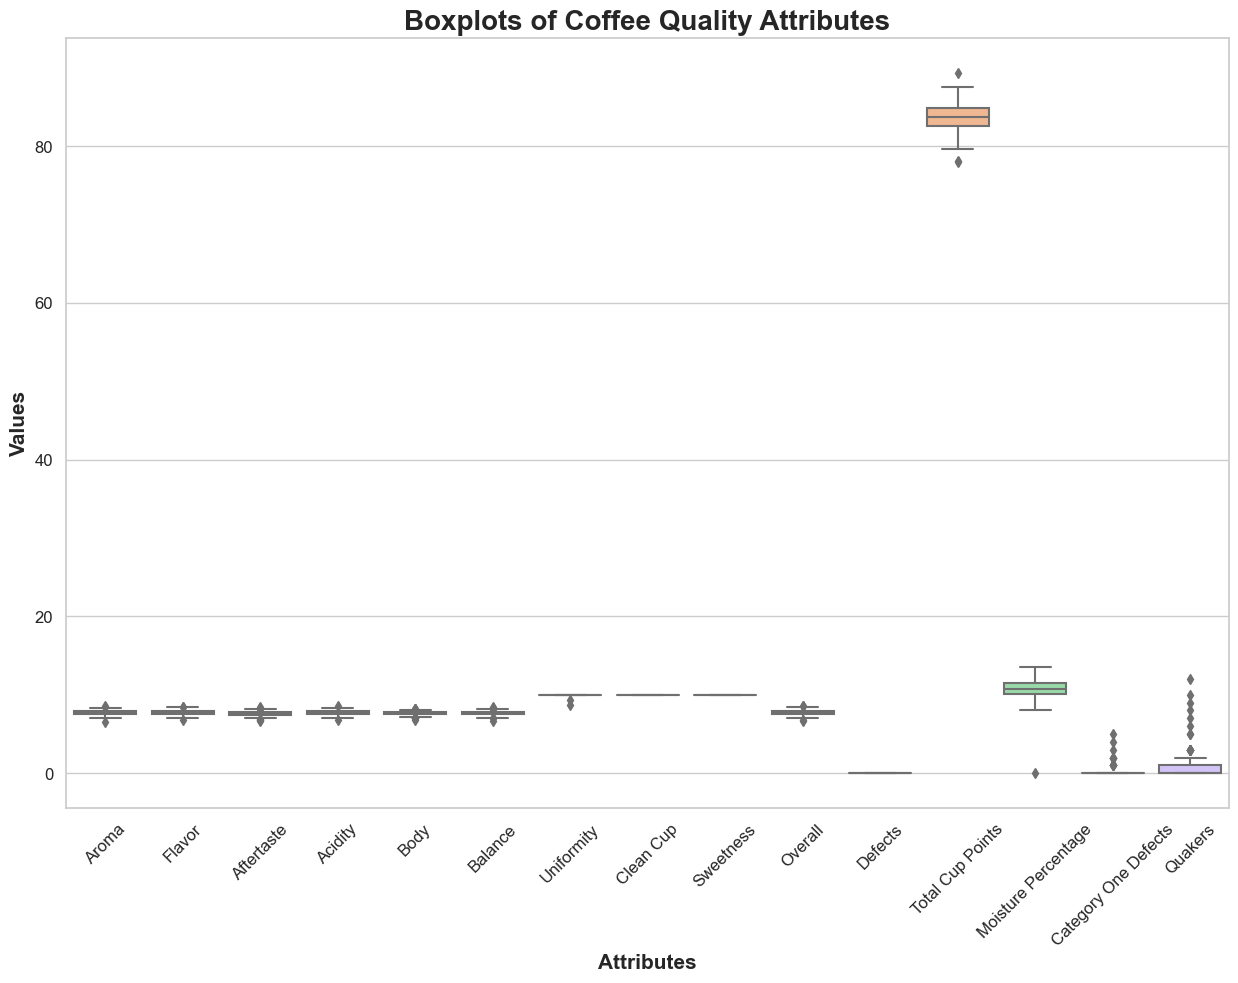

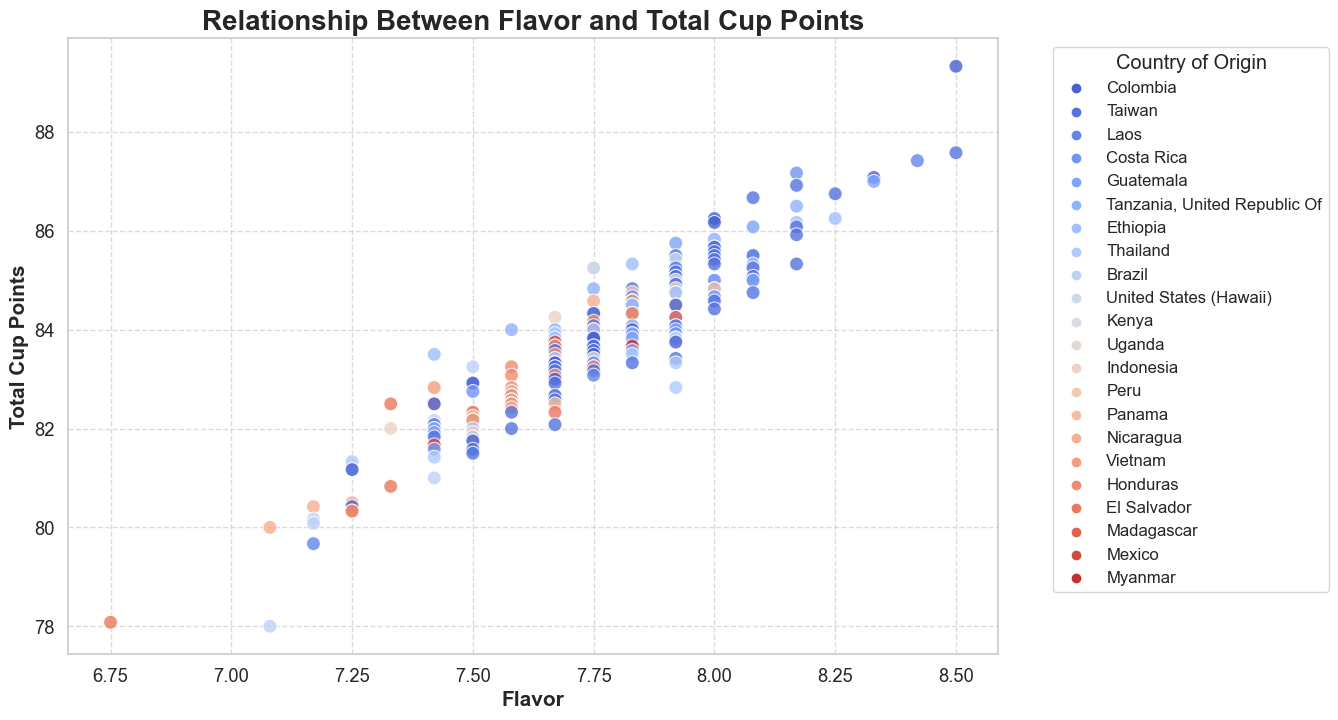

C:\Users\iamim\AppData\Local\Temp\ipykernel_17008\3081503852.py:46: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




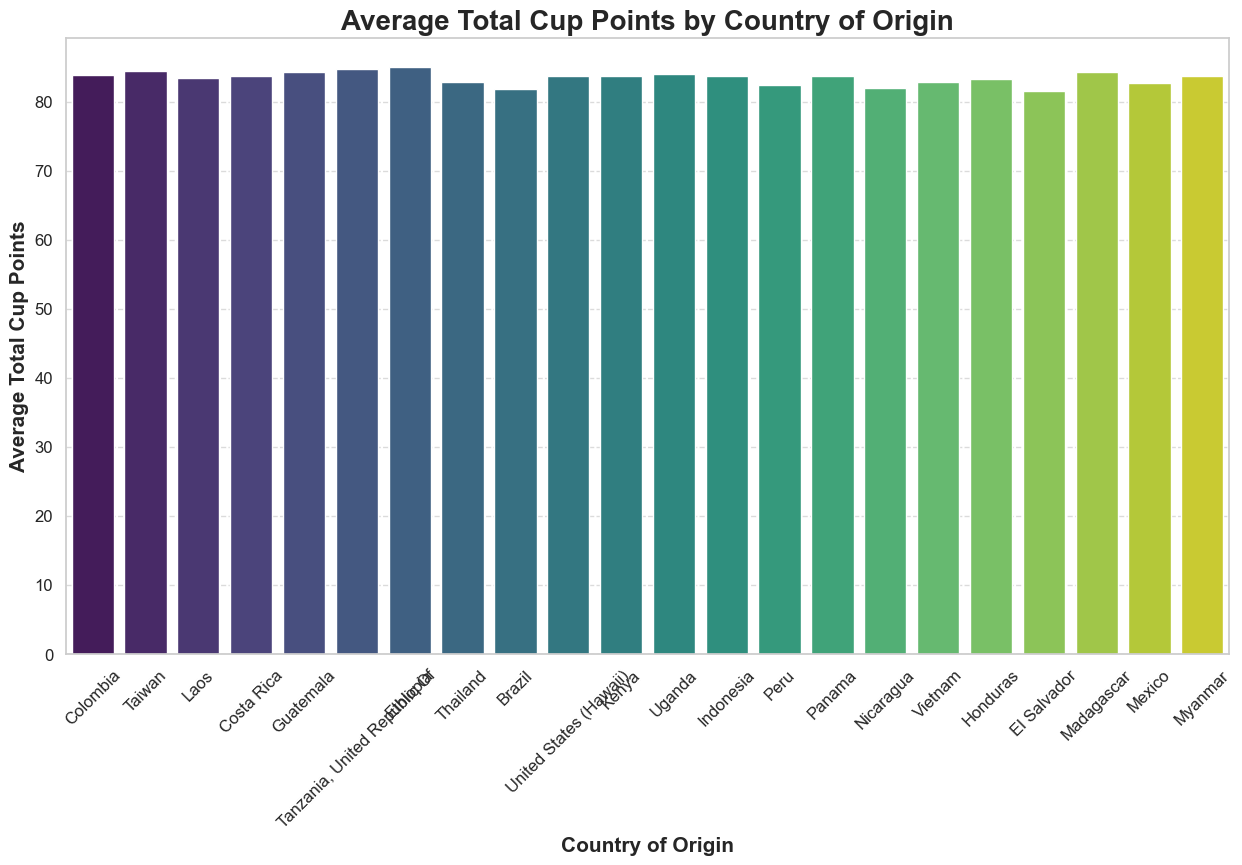

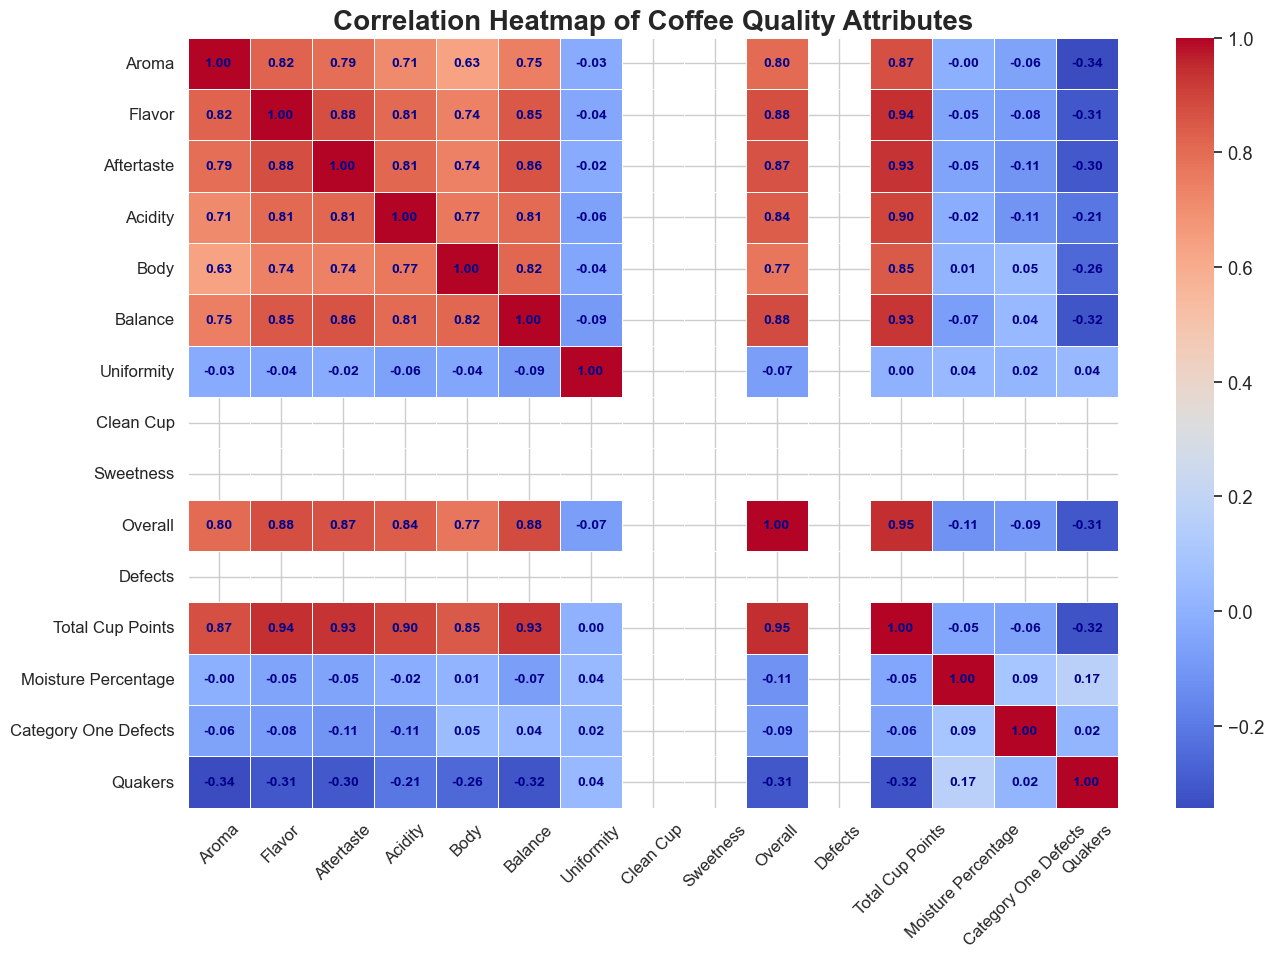

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of variables for analysis
variables = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 
    'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects', 
    'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 
    'Quakers'
]

# Set the style for the plots
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Step 1: Histograms for Each Variable
plt.figure(figsize=(15, 12))
data[variables].hist(bins=10, figsize=(15, 12), color='skyblue', edgecolor='black', grid=False)
plt.suptitle('Distribution of Coffee Quality Attributes', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make space for the title
plt.show()

# Step 2: Boxplot for Each Variable
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[variables], palette='pastel')
plt.title('Boxplots of Coffee Quality Attributes', fontsize=20, fontweight='bold')
plt.xlabel('Attributes', fontsize=15, fontweight='bold')
plt.ylabel('Values', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Step 3: Scatter Plot - Flavor vs. Total Cup Points
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Flavor', y='Total Cup Points', hue='Country of Origin', 
                palette='coolwarm', s=100, alpha=0.8, edgecolor='w', linewidth=0.8)
plt.title('Relationship Between Flavor and Total Cup Points', fontsize=20, fontweight='bold')
plt.xlabel('Flavor', fontsize=15, fontweight='bold')
plt.ylabel('Total Cup Points', fontsize=15, fontweight='bold')
plt.legend(title='Country of Origin', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Step 4: Bar Plot - Country of Origin vs. Total Cup Points
plt.figure(figsize=(15, 8))
sns.barplot(data=data, x='Country of Origin', y='Total Cup Points', palette='viridis', ci=None)
plt.title('Average Total Cup Points by Country of Origin', fontsize=20, fontweight='bold')
plt.xlabel('Country of Origin', fontsize=15, fontweight='bold')
plt.ylabel('Average Total Cup Points', fontsize=15, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Step 5: Correlation Heatmap
plt.figure(figsize=(15, 10))
corr = data[variables].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            annot_kws={'size': 10, 'weight': 'bold', 'color': 'darkblue'})
plt.title('Correlation Heatmap of Coffee Quality Attributes', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


###### Correlation Analysis

In [44]:
import plotly.express as px

# Define the variables to analyze correlations
variables = [
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 
    'Uniformity', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points'
]

# Calculate the correlation matrix
corr_matrix = data[variables].corr()

# Create the heatmap using Plotly
fig = px.imshow(
    corr_matrix,
    labels=dict(x="Variables", y="Variables", color="Correlation"),
    x=variables,
    y=variables,
    color_continuous_scale='RdBu_r',  # Reversed 'RdBu' for a more intuitive color mapping
    zmin=-1,  # Set minimum correlation value for consistent scaling
    zmax=1,   # Set maximum correlation value for consistent scaling
    title='Correlation Heatmap of Coffee Quality Attributes',
    aspect="auto",  # Ensures aspect ratio is automatically determined
)

# Update layout to enhance appearance
fig.update_layout(
    title={
        'text': 'Correlation Heatmap of Coffee Quality Attributes',
        'font': {'size': 24, 'family': 'Arial', 'color': 'DarkSlateGray'},
        'x': 0.5,
        'xanchor': 'center'
    },
    xaxis_title='Coffee Quality Attributes',
    yaxis_title='Coffee Quality Attributes',
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=12, family='Arial', color='Black')
    ),
    yaxis=dict(
        tickfont=dict(size=12, family='Arial', color='Black')
    ),
    width=800,
    height=800,
    margin=dict(l=100, r=100, t=100, b=100),
    coloraxis_colorbar=dict(
        title='Correlation',
        thickness=15,
        len=0.75,
        ticks='outside',
        tickfont=dict(size=12),
        titlefont=dict(size=14)
    ),
    plot_bgcolor='white',  # Background color of the plot
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
)

# Add annotations for better clarity
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        fig.add_annotation(
            x=variables[j],
            y=variables[i],
            text=f"{corr_matrix.iloc[i, j]:.2f}",
            showarrow=False,
            font=dict(size=11, color='black' if abs(corr_matrix.iloc[i, j]) < 0.6 else 'white')  # Adjust text color based on background
        )

# Show the figure
fig.show()


###### Identification of Numerical Variables in the dataset

In [45]:
import pandas as pd

# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include=['number']).columns

# Print the names of numerical columns
print("Numerical Columns in the DataFrame:")
for col in numerical_columns:
    print(col)


Numerical Columns in the DataFrame:
Unnamed: 0
ID
Number of Bags
Aroma
Flavor
Aftertaste
Acidity
Body
Balance
Uniformity
Clean Cup
Sweetness
Overall
Defects
Total Cup Points
Moisture Percentage
Category One Defects
Quakers
Category Two Defects
Mean Score


### Multiple Regression Variable Modeling

In [47]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Mean Score
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,8.814444
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",8.621111
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612",8.602222
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,8.574444
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,8.564444


In [52]:
# Display data types
print("Data Types:")
print(data.dtypes)

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns
non_numeric_cols = data.select_dtypes(exclude=['number']).columns

print("\nNumeric Columns:")
print(numeric_cols)

print("\nNon-Numeric Columns:")
print(non_numeric_cols)

# Fill missing values for numeric columns with column mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Handle missing values in non-numeric columns
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Example: filling with mode

# Verify missing values are handled
print("\nMissing Values after Imputation:")
print(data.isnull().sum())

# Verify data types after handling missing values
print("\nData Types after Imputation:")
print(data.dtypes)


Data Types:
Unnamed: 0                 int64
ID                         int64
Country of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
ICO Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number of Bags             int64
Bag Weight                object
In-Country Partner        object
Harvest Year              object
Grading Date              object
Owner                     object
Variety                   object
Status                    object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetness                float64
Overall                  float6

In [53]:
# Now continue with feature selection, splitting, training, and evaluating the model
independent_vars = ['Aroma', 'Flavor']  # Example independent variables
dependent_var = 'Total Cup Points'  # Example dependent variable

# Extract features and target
X = data[independent_vars]
y = data[dependent_var]


In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Initialize and train the Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


LinearRegression()

In [56]:
# Display model coefficients
print("\nModel Coefficients:")
print(f"Intercept: {regression_model.intercept_}")
for idx, coef in enumerate(regression_model.coef_):
    print(f"Coefficient for {independent_vars[idx]}: {coef}")



Model Coefficients:
Intercept: 35.79207032807622
Coefficient for Aroma: 1.9013565731881188
Coefficient for Flavor: 4.292202508997079


In [57]:
# Predict on the test set and evaluate the model
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 0.14
R² Score: 0.94


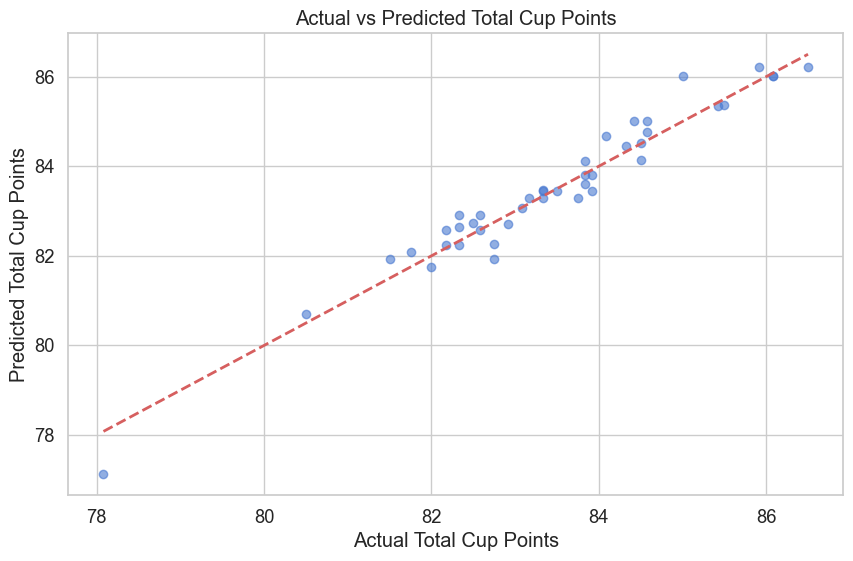

In [58]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Total Cup Points')
plt.ylabel('Predicted Total Cup Points')
plt.title('Actual vs Predicted Total Cup Points')
plt.show()


### Navie bayis

##### Classification

### 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
             'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points', 
             'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Mean Score']
target = 'Category One Defects'  # Assuming this is categorical

# Extract features and target
X = data[features]
y = data[target]

# Check the unique values in the target variable
print("\nUnique values in target variable:")
print(y.unique())



Unique values in target variable:
[0 2 1 3 4 5]


In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the train and test sets
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Test set shape (X_test): {X_test.shape}")


Training set shape (X_train): (165, 17)
Test set shape (X_test): (42, 17)


In [65]:
# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model using the training data
nb_model.fit(X_train, y_train)

# Display model parameters (optional)
print("\nModel Parameters:")
print(nb_model.get_params())



Model Parameters:
{'priors': None, 'var_smoothing': 1e-09}



Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.00      0.00      0.00         0
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.88        42
   macro avg       0.21      0.22      0.21        42
weighted avg       0.88      0.88      0.88        42


Confusion Matrix:
[[36  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  0  0  0]]


c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

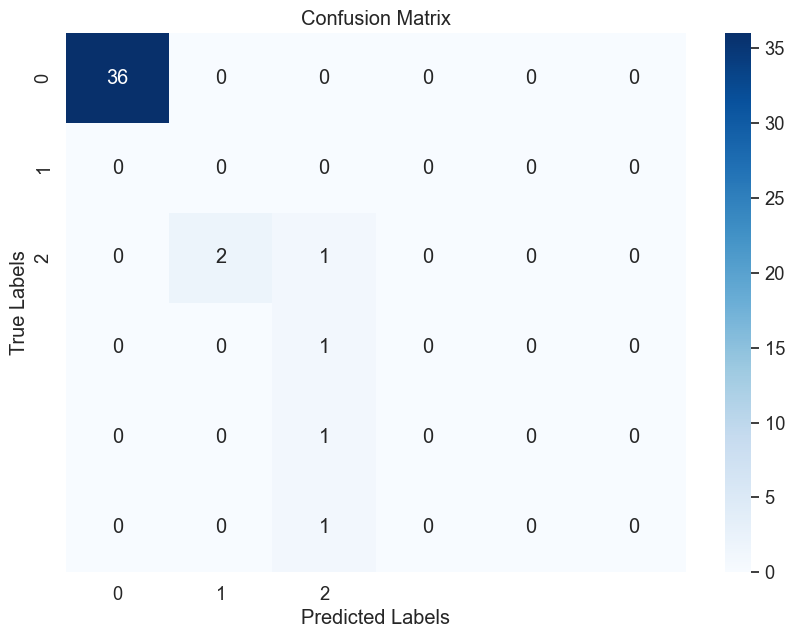

In [66]:
# Predict on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##### Regression 

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [74]:


# Define features and target
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
             'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points', 
             'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Mean Score']
target = 'Total Cup Points'  # Change to your target variable for regression

X = data[features]
y = data[target]


In [75]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [77]:
# Initialize and train Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train_scaled, y_train)


BayesianRidge()

Mean Squared Error: 0.00
R^2 Score: 1.00


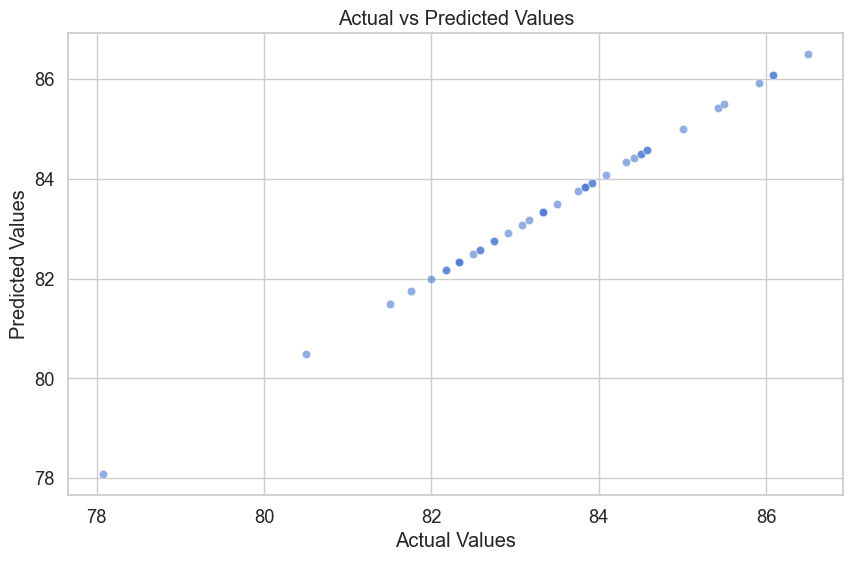

In [78]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


### Random Forest Classifier

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [80]:


# Define features and target
features = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 
             'Clean Cup', 'Sweetness', 'Overall', 'Defects', 'Total Cup Points', 
             'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Mean Score']
target = 'Category One Defects'  # Replace with your target variable

X = data[features]
y = data[target]


In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [83]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        36
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.86        42
   macro avg       0.15      0.17      0.16        42
weighted avg       0.79      0.86      0.82        42


Confusion Matrix:
[[36  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  0]]


c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\iamim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` param

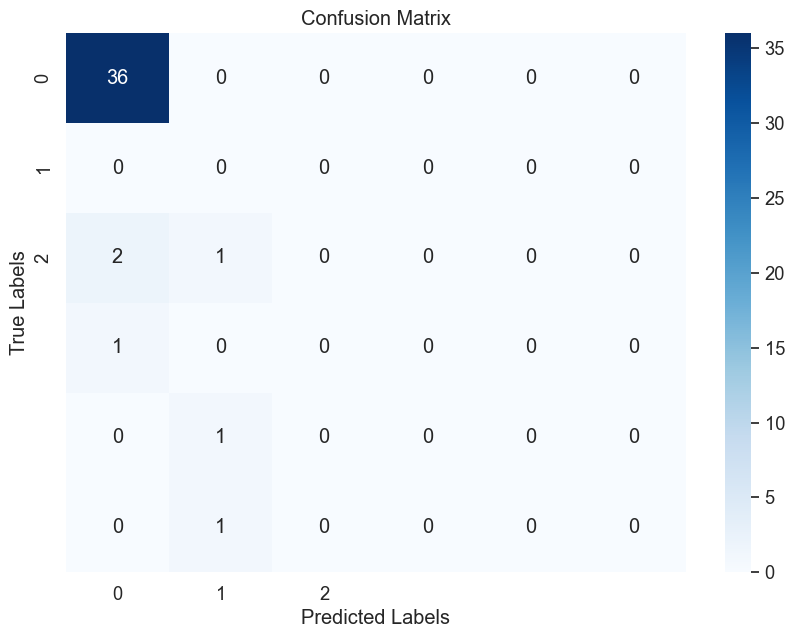

In [84]:
# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Decision Tree Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree


In [4]:
# Load the dataset
data = pd.read_csv('C:\\Users\\iamim\\OneDrive\\Desktop\\Seventh_Semester\\ML_LAB\\L2\\df_arabica_clean.csv')  # Replace 'your_dataset.csv' with your actual file path

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Fill missing values with the column mean (if needed)
data.fillna(data.mean(numeric_only=True), inplace=True)


   Unnamed: 0  ID Country of Origin                 Farm Name  \
0           0   0          Colombia          Finca El Paraiso   
1           1   1            Taiwan  Royal Bean Geisha Estate   
2           2   2              Laos        OKLAO coffee farms   
3           3   3        Costa Rica                 La Cumbre   
4           4   4          Colombia           Finca Santuario   

                                Lot Number                           Mill  \
0                               CQU2022015               Finca El Paraiso   
1  The 2022 Pacific Rim Coffee Summit,T037       Royal Bean Geisha Estate   
2  The 2022 Pacific Rim Coffee Summit,LA01  oklao coffee processing plant   
3                               CQU2022017        La Montana Tarrazu MIll   
4                               CQU2023002                Finca Santuario   

  ICO Number                   Company   Altitude                Region  ...  \
0        NaN      Coffee Quality Union  1700-1930        Piendamo,

In [5]:
# Define features and target variable
features = ['Aroma', 'Flavor', 'Aftertaste']  # Independent variables
target = 'Total Cup Points'  # Dependent variable

X = data[features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [7]:
# Predict on the test data
y_pred = dt_regressor.predict(X_test)


In [8]:
# Calculate Mean Squared Error (MSE) and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 0.38
R^2 Score: 0.85


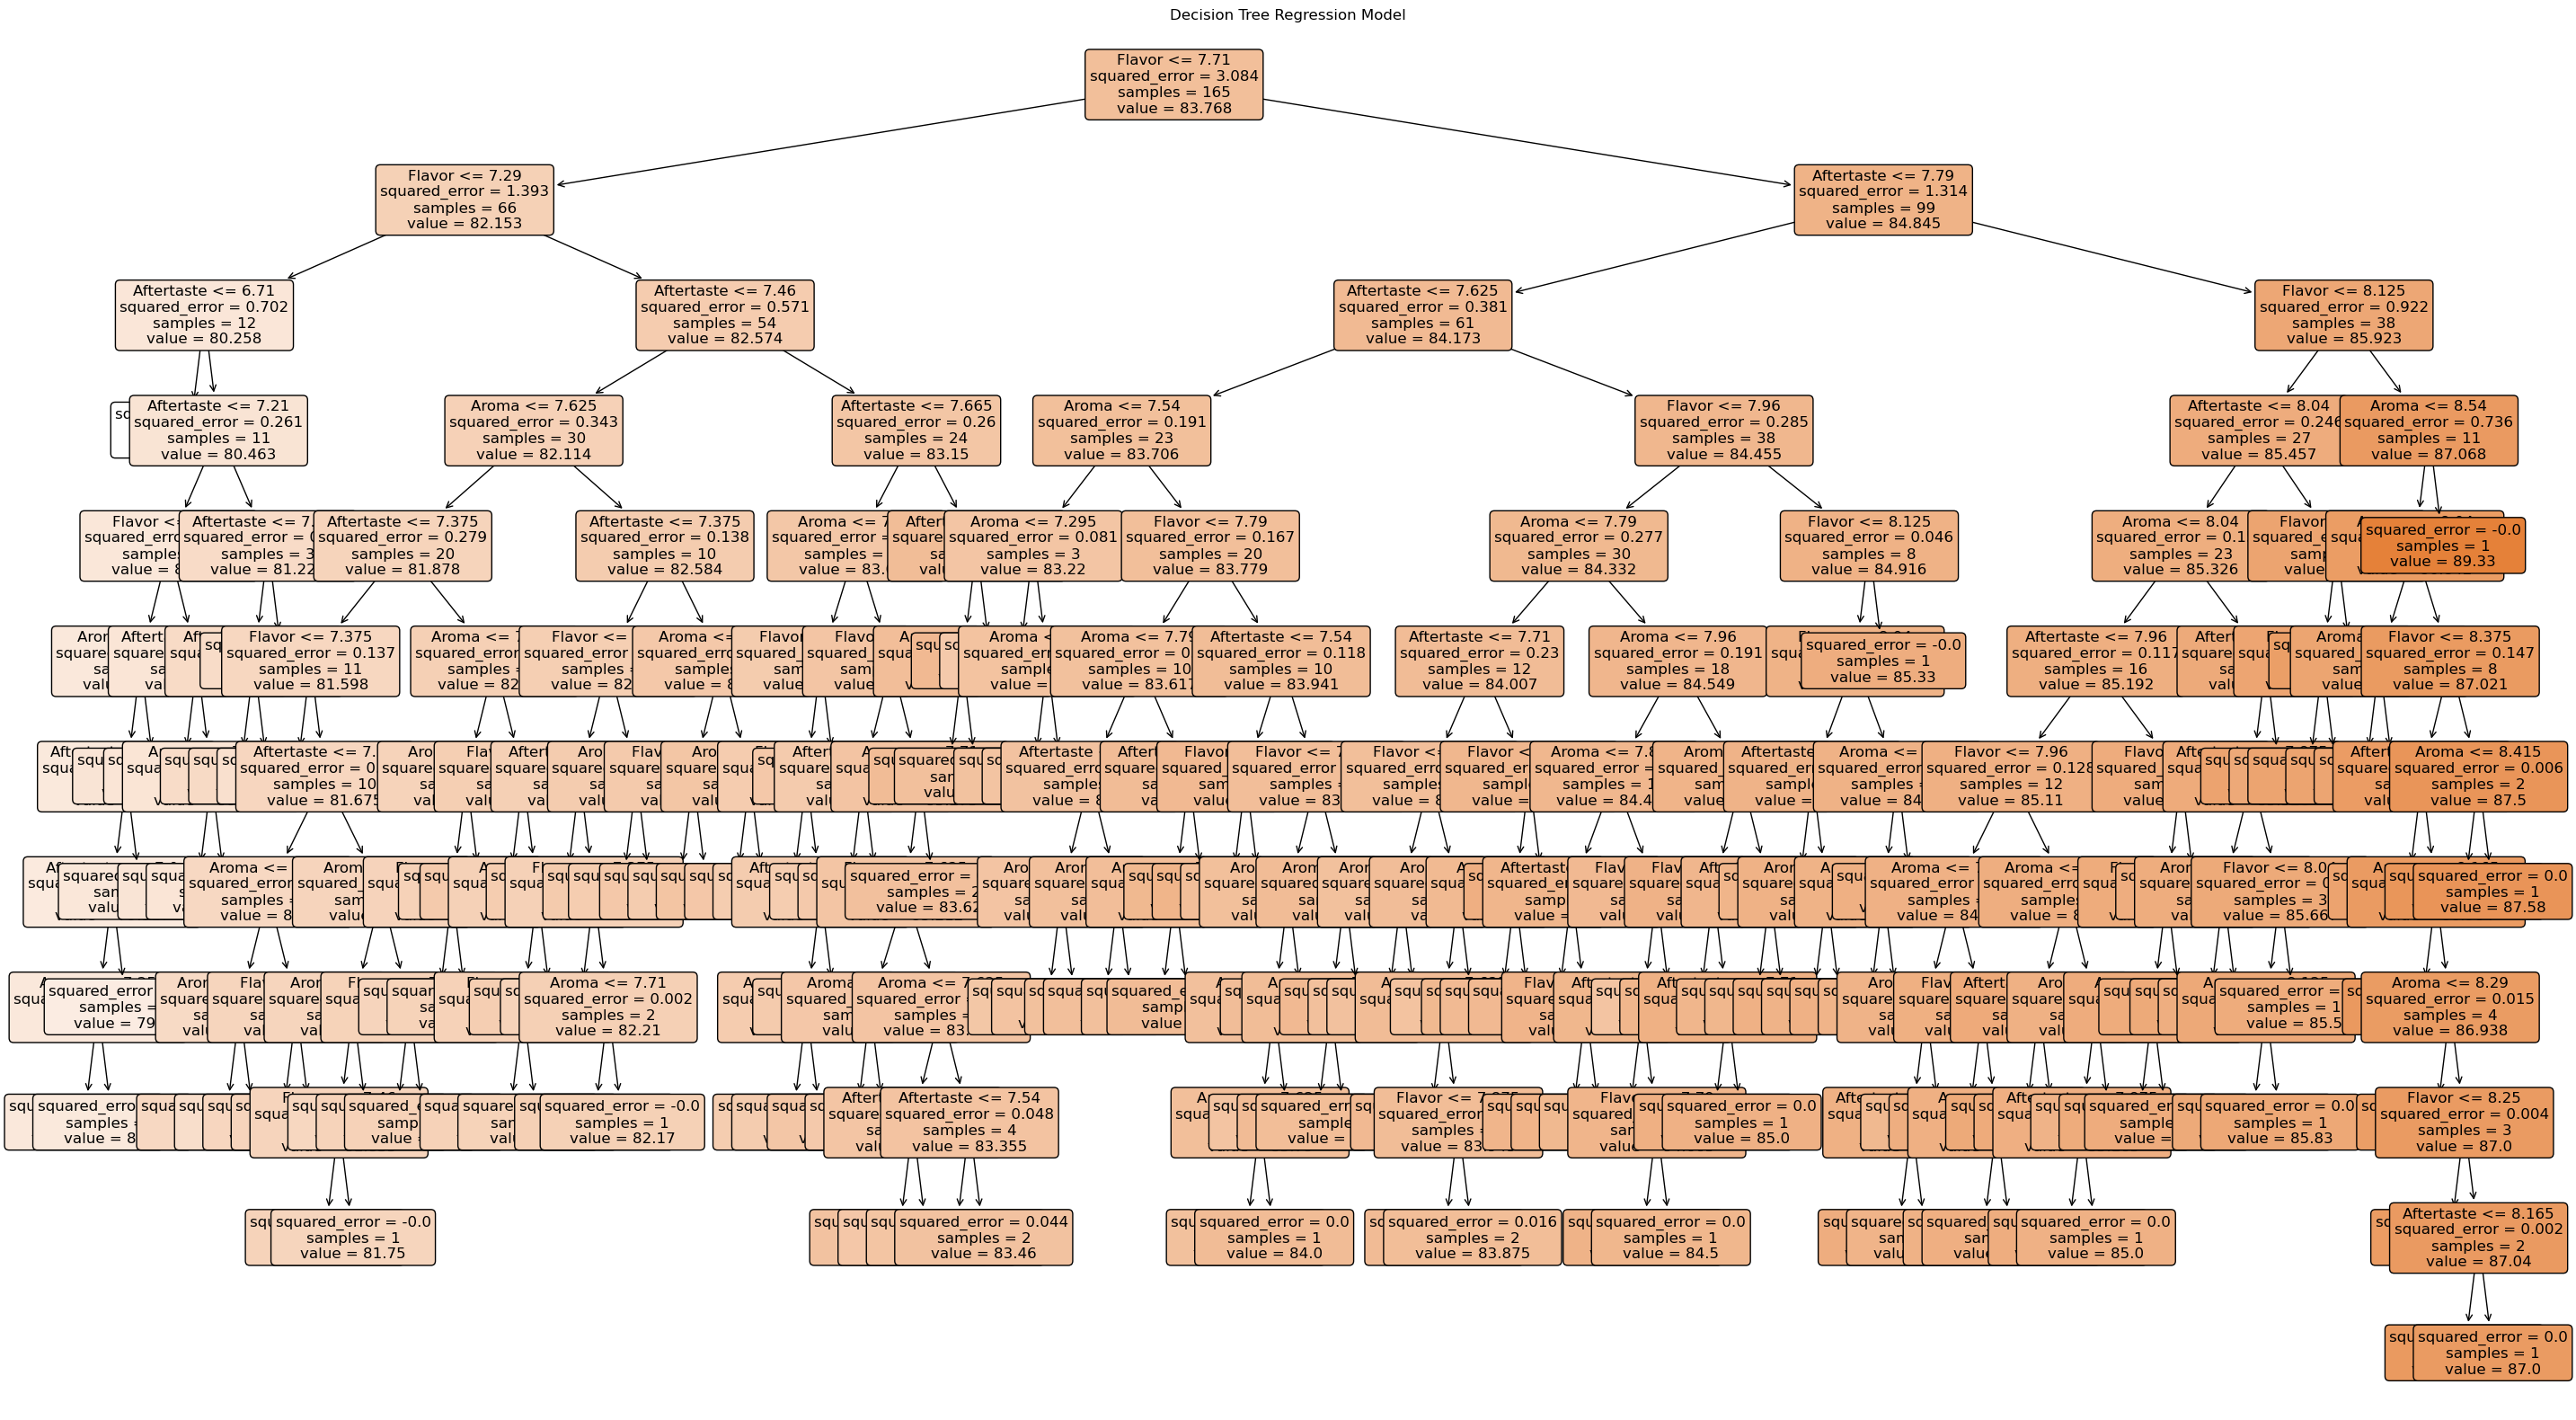

In [11]:
# Plotting the decision tree
plt.figure(figsize=(35, 20))
plot_tree(dt_regressor, feature_names=features, filled=True, rounded=True, 
fontsize=12)
plt.title('Decision Tree Regression Model')
plt.show()


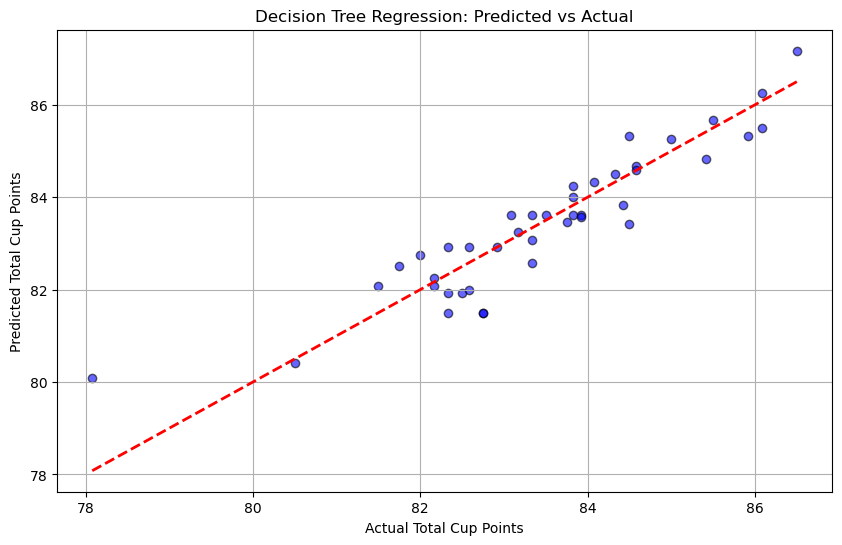

In [12]:
# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Total Cup Points')
plt.ylabel('Predicted Total Cup Points')
plt.title('Decision Tree Regression: Predicted vs Actual')
plt.grid(True)
plt.show()
